# Camera calibration for accurate measurement

1. Print `../assets/calibration.png` 
1. Run calibration.py that will use the webcam to calibrate the camera (you can pause and move around the printed square grid on the camera)
1. If it worked you should see a camera_calibration.npz file

In [29]:
import numpy as np
calibration_data = np.load('../assets/camera_calibration.npz')

camera_matrix = calibration_data["camera_matrix"]
dist_coeff = calibration_data["dist_coeff"]
rotation_vectors = calibration_data["rotation_vectors"]
translation_vectors = calibration_data["translation_vectors"]

# Camera matrix
# fx  0 cx
# 0  fy cy
# 0   0  1
focal_length_x = camera_matrix[0, 0]
focal_length_y = camera_matrix[1, 1]
optical_centers_x = camera_matrix[0, 2]
optical_centers_y = camera_matrix[1, 2]
print(f"Focal Lengths: {focal_length_x}, {focal_length_y}")
print(f"Optical Centers: {optical_centers_x}, {optical_centers_y}")

Focal Lengths: 988.0911114841191, 951.1121103675431
Optical Centers: 316.62528012166956, 257.06174025174744


[[388.00660939   0.         349.46939956]
 [  0.         380.16356382 246.60165679]
 [  0.           0.           1.        ]]


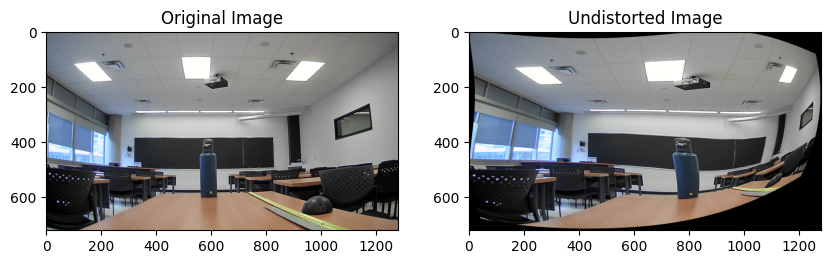

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Computing the pixel size in meters

# They should be the same since we are trying to measure a square
size_x_meter = 0.021 # in meters
size_y_meter = 0.021 # in meters

calibration_data = np.load('../assets/camera_calibration.npz')

camera_matrix = calibration_data["camera_matrix"]
dist_coeff = calibration_data["dist_coeff"]
print(camera_matrix)
# Load the image
image = cv2.imread('../assets/calib_2.jpg') 
h, w = image.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coeff, (w,h), 1, (w,h))
# Undistort the image
undistorted_image = cv2.undistort(image, camera_matrix, dist_coeff, None, newcameramtx)



fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')

# Plot the undistorted image
axes[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axes[1].set_title('Undistorted Image')

plt.show()
